In [2]:
import gensim

In [ ]:
documents = [
    "The quick brown fox jumps over the lazy dog.",
    "Artificial intelligence is transforming the world rapidly.",
    "Python is an incredibly versatile programming language.",
    "She sells seashells by the seashore on a sunny day.",
    "Data science involves statistics, coding, and domain expertise.",
    "In the heart of the forest, the birds sing their morning song.",
    "Space exploration has always captured the imagination of humanity.",
    "The coffee machine broke just before the morning rush.",
    "Quantum computing could revolutionize cryptography and data security.",
    "A warm cup of tea can be soothing on a cold winter evening."
]

In [9]:
model = gensim.models.Word2Vec(
    documents
    , vector_size=50
    , window=5
    , min_count=1
    , workers=10
)

model.train(documents,total_examples=len(documents),epochs=2)

(60872565, 83038720)

In [11]:
model.wv.most_similar('machine', topn= 3)

[('machines', 0.7626938819885254),
 ('bucket', 0.7331673502922058),
 ('maker', 0.7157562971115112)]

Emplee la función Word2Vec de la librería gensim para generar
embeddings a partir de los documentos del dataset. Elija los
mejores valores a su opinion para cada uno de los parametros de
la funcion (vector_size, window, min_count, workers)

In [12]:

try:
    with open('reviews_data.txt', 'r', encoding='utf-8', errors='replace') as file:
        documents = file.readlines()
except FileNotFoundError:
    print("Errror")
    raise


tokenized_documents = [doc.lower().split() for doc in documents]

model = Word2Vec(
    sentences=tokenized_documents,   # Frases tokenizadas
    vector_size=150,                 # Dimensión de los vectores generados
    window=10,                       # Tamaño de la ventana de contexto
    min_count=2,                     # Frecuencia mínima de las palabras para ser incluidas
    workers=4                        # Número de threads a utilizar
)

# Visualizar las palabras en el vocabulario
vocabulary = list(model.wv.index_to_key)
print("Primeras palabras en el vocabulario:", vocabulary[:10])

# Obtener el vector de una palabra específica 
word = 'hotel'
if word in vocabulary:
    example_word_vector = model.wv[word]
    print(f"Vector para la palabra '{word}':", example_word_vector)
else:
    print(f"Palabra '{word}' no encontrada en el vocabulario")

Primeras palabras en el vocabulario: ['the', 'and', 'a', 'to', 'was', 'in', 'i', 'of', 'we', 'for']
Vector para la palabra 'hotel': [ 0.6906051  -1.2586868  -1.4271488   1.384317   -0.3468378  -2.667231
 -3.7142928  -1.2021538   0.21431115  1.3106644   1.5941836   0.7960171
  0.2143457   3.4550664  -0.16630808  3.9640272  -0.44858727  2.4026794
  0.7563458  -0.71291924 -0.6591711   2.4989266  -2.3492024  -0.06292453
 -1.5616552  -2.1807806   2.4997323   3.355107    2.6520753   0.8178963
  2.056435    0.00932932  3.2999637   1.0335426  -4.575043   -0.33221444
  1.527424   -2.5829623  -0.6889749  -3.6082222   2.83605     2.1146958
 -0.9168303   1.2997478  -1.1252557   0.04006851 -0.5288743   1.6848862
  0.76960444  3.633782   -0.19376113  0.9140813  -0.00996975  3.2757962
 -0.7816288   0.8258836   0.09029042  0.65542734 -0.27609926 -0.77253413
 -1.3429077   1.9510546   1.764447   -1.2862281   1.6719649  -0.59084094
 -2.4026244  -3.6985235   4.6565456   0.25164646  0.97367376 -4.4708548
 

b.Usando los embeddings generados, aplica la función most_similar
para encontrar las 10 palabras más similares a cada una de las
siguientes:
• Street
• Good
• Dog
• Mother
• Bed


In [8]:
# Encontrar las 10 palabras más similares para cada palabra dada
words_to_check = ['street', 'good', 'dog', 'mother', 'bed']
for word in words_to_check:
    if word in vocabulary:
        similar_words = model.wv.most_similar(word, topn=10)
        print(f"Las 10 palabras más similares a '{word}':", similar_words)
    else:
        print(f"Palabra '{word}' no encontrada en el vocabulario")

Las 10 palabras más similares a 'street': [('street,', 0.9437122344970703), ('road,', 0.8538790345191956), ('road', 0.8538007736206055), ('street)', 0.84494549036026), ('street).', 0.8397825956344604), ('street),', 0.8333706855773926), ('street.', 0.8297929763793945), ('street;', 0.8036163449287415), ('st.,', 0.788267195224762), ('street-', 0.7801230549812317)]
Las 10 palabras más similares a 'good': [('decent', 0.8161363005638123), ('great', 0.8117327690124512), ('good,', 0.7491258978843689), ('excellent', 0.6969442367553711), ('good.', 0.6682630181312561), ('nice', 0.6622501611709595), ('reasonable', 0.6241666674613953), ('terrific', 0.624139666557312), ('fantastic', 0.5911068320274353), ('good;', 0.5876911878585815)]
Las 10 palabras más similares a 'dog': [('dogs', 0.7071871161460876), ('dog,', 0.6613819003105164), ('pet', 0.5919435620307922), ('dog.', 0.5624600648880005), ('child', 0.541416585445404), ('kid', 0.5237579941749573), ('dogs,', 0.5198174118995667), ('aunt', 0.5105847120

c.Extrae los embeddings de estas 55 palabras (las 5 palabras iniciales
más sus 10 palabras similares cada una)

In [7]:
words_to_check = ['street', 'good', 'dog', 'mother', 'bed']
similar_words_dict = {}
all_words = set(words_to_check)

for word in words_to_check:
    if word in vocabulary:
        similar_words = model.wv.most_similar(word, topn=10)
        similar_words_dict[word] = similar_words
        all_words.update([w for w, _ in similar_words])
        
embeddings = {}
for word in all_words:
    if word in vocabulary:
        embeddings[word] = model.wv[word]

for word, vector in embeddings.items():
    print(f"Embedding para la palabra '{word}':", vector)

Embedding para la palabra 'excellent': [-2.3997574  -0.85431755 -2.4300072   2.8016047  -1.1128148   4.3339524
  2.8809125  -1.3574468   1.0456476  -4.1633058   3.063513   -1.9118544
  1.5008641   0.261525   -0.71599424  3.3036833  -5.3221574  -0.60831666
  3.2587934  -0.268743    0.23423326  2.2862744   3.23409    -3.1804104
  3.0958505   1.068836   -4.1881623   1.0997684   1.2041787  -3.324028
  2.1189587  -2.0797439   5.5308905   2.758902   -2.05968    -3.5909479
  2.8963196  -0.27904946  1.3781987   1.6510279   0.7096585   3.3909185
 -3.578846   -0.64570284  0.7671523   0.20547752 -0.32866105 -2.6680605
 -3.8550577   2.0928419  -3.7191753   0.10897122 -2.7766864   1.3486829
  2.561655   -0.90370005  0.8990939   0.96384686 -0.4801839   4.235605
 -0.09386339 -1.0427833  -1.454385   -0.46674207  0.6361841  -0.04023417
  0.95933384 -0.47565633 -0.4249543   1.8715386  -3.2320771   3.2190888
  3.0138612  -4.021894    3.2303154  -5.1675124   4.275496   -2.3246722
  2.2569637  -6.9455223  

d. Aplica PCA para reducir la dimensionalidad de los embeddings a 2
componentes principales.


e. Crea un gráfico de dispersión (scatter plot) con estos 2
componentes y describe los resultados obtenidos. Su gráfico
debería verse similar a este ejemplo

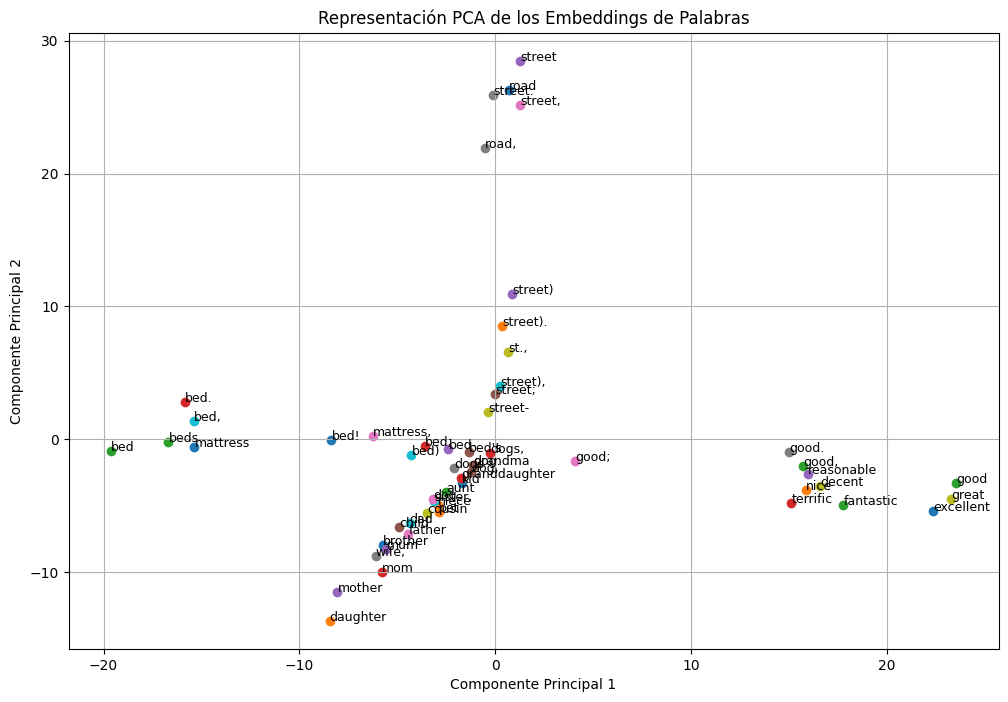

In [10]:
# Aplicar PCA para reducir la dimensionalidad de los embeddings a 2 componentes principales
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

embedding_vectors = list(embeddings.values())
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embedding_vectors)

plt.figure(figsize=(12, 8))
for i, word in enumerate(embeddings.keys()):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.text(reduced_embeddings[i, 0] + 0.01, reduced_embeddings[i, 1] + 0.01, word, fontsize=9)

plt.title("Representación PCA de los Embeddings de Palabras")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid()
plt.show()